In [1]:
import requests, re, pandas as pd, numpy as np
from itertools import product
from bs4 import BeautifulSoup as bs
from scipy import stats
import pandas as pd
import numpy as np
from datetime import datetime
from xgboost import XGBClassifier, XGBRegressor
import utils
import cleaning, utils
import importlib
import matplotlib.pyplot as plt

importlib.reload(utils)

<module 'utils' from 'Y:\\Internship\\SoMin\\Notebook\\src\\utils.py'>

In [2]:
# ACCESS_TOKEN = 'EAAEau61SMogBAO4Lp0pJaYlJzc67wTychUcwF6gdpLWlet5TqpwnB6k6u0v8DuVAWFaMGO09CQlA7GoOjJnJzTdwzTCO2ZBtCQO721V5U1Qjy5vb7pZCEBC2N5AZAbzVWVYylg1bZCSehy28TTJP7QntMgpxGhD5einLmDxUz3pFfYHPmi47'

In [3]:
import os
import pickle
from datetime import datetime
def ensure_folder_exists(folder_path):
    """
    Creates the specified folder if it does not already exist
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


def load_pickle(file_path):
    """
    Loads a pickle from the file system
    """
    return pickle.load(open(file_path, 'rb')) if os.path.isfile(file_path) else None


def save_pickle(file_path, data):
    """
    Saves the specified object as a pickle to the file system
    """
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
target = 'Y:/Internship/SoMin/raw/20220523/adlibrary_ads.pkl'
if os.path.getsize(target) > 0: 
    all_ads = load_pickle(target)
    print(len(all_ads))
else:
    print('empty')

38985


In [4]:
df = cleaning.process_ads(all_ads)
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,max_audience_size,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,100000,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,500000,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,5000,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,50000,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,5000,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,NaN,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,NaN,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,NaN,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,NaN,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [5]:
# err_index = utils.load_pickle("Y:/Internship/SoMin/Notebook/log/error_ad_index.pkl")
# print(len(err_index))

In [6]:
# df = df.drop(index=err_index)
# df.shape

(array([3.8625e+04, 1.6500e+02, 3.6000e+01, 2.6000e+01, 2.0000e+01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   49.,  2794.,  5539.,  8284., 11029., 13774., 16519., 19264.,
        22009., 24754., 27499.]),
 <BarContainer object of 10 artists>)

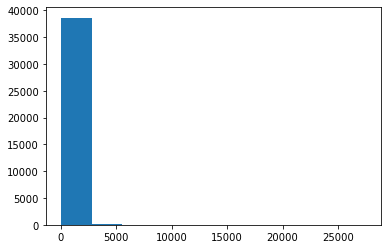

In [9]:
plt.hist(df['spend'])

(array([3.7963e+04, 5.2000e+02, 1.6700e+02, 8.1000e+01, 5.9000e+01,
        2.8000e+01, 2.7000e+01, 1.6000e+01, 8.0000e+00, 5.0000e+00]),
 array([4.99000e+02, 9.54490e+04, 1.90399e+05, 2.85349e+05, 3.80299e+05,
        4.75249e+05, 5.70199e+05, 6.65149e+05, 7.60099e+05, 8.55049e+05,
        9.49999e+05]),
 <BarContainer object of 10 artists>)

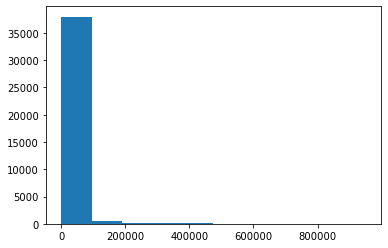

In [10]:
plt.hist(df['impressions'])

In [7]:
df['country'].value_counts()

US    37842
GB      901
BR      131
Name: country, dtype: int64

## spend/delivery_period

In [8]:
# df['spend_per_day'] = pd.DataFrame(np.divide(np.array(df['spend']), np.array(df['delivery_period'])))
# df

In [13]:
df2 = df

In [14]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,max_audience_size,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,100000,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,500000,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,5000,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,50000,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,5000,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,NaN,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,NaN,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,NaN,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,NaN,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [15]:
df2['spend_per_day'] = pd.DataFrame(np.divide(np.array(df2['spend']), np.array(df2['delivery_period'])))
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",12.250000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",12.250000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",8.166667
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",3.062500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",18.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",16.333333
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",27.666667
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",16.333333
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",12.250000


(array([3.8724e+04, 1.0800e+02, 2.4000e+01, 7.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([5.71761960e-02, 4.37526459e+02, 8.74995741e+02, 1.31246502e+03,
        1.74993431e+03, 2.18740359e+03, 2.62487287e+03, 3.06234215e+03,
        3.49981144e+03, 3.93728072e+03, 4.37475000e+03]),
 <BarContainer object of 10 artists>)

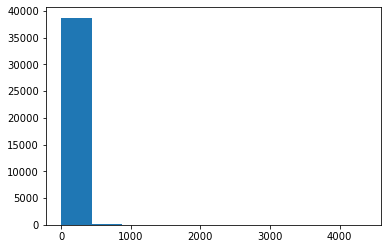

In [16]:
plt.hist(df2['spend_per_day'])

In [17]:
df2.spend_per_day.describe()

count    38874.000000
mean        27.083324
std         72.326325
min          0.057176
25%          7.000000
50%         16.333333
75%         24.500000
max       4374.750000
Name: spend_per_day, dtype: float64

(array([22856.,  8130.,  5851.,   331.,   474.,   140.,   162.,   140.,
          132.,    63.]),
 array([5.71761960e-02, 1.71540902e+01, 3.42510041e+01, 5.13479181e+01,
        6.84448320e+01, 8.55417460e+01, 1.02638660e+02, 1.19735574e+02,
        1.36832488e+02, 1.53929402e+02, 1.71026316e+02]),
 <BarContainer object of 10 artists>)

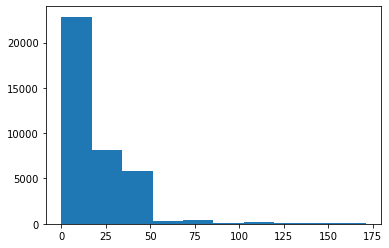

In [18]:
df2 = df2[(np.abs(stats.zscore(df2['spend_per_day'])) < 2)]
# df2.spend_per_day = np.log(df10.CPM2)
plt.hist(df2.spend_per_day)

C:\Users\root\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([1.0000e+00, 2.7000e+01, 2.6500e+02, 9.4900e+02, 3.2180e+03,
        4.8030e+03, 9.3340e+03, 1.2396e+04, 6.4890e+03, 7.9700e+02]),
 array([-2.86161762, -2.06127411, -1.26093061, -0.4605871 ,  0.3397564 ,
         1.14009991,  1.94044341,  2.74078692,  3.54113043,  4.34147393,
         5.14181744]),
 <BarContainer object of 10 artists>)

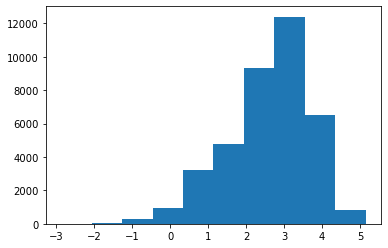

In [19]:
df2.spend_per_day = np.log(df2.spend_per_day)
plt.hist(df2.spend_per_day)

In [20]:
# df2.spend_per_day_sqrt = np.sqrt(df2.spend_per_day)
# plt.hist(df2.spend_per_day_sqrt)

In [21]:
# df2['spend_per_day_square'] = np.square(df2.spend_per_day)
# plt.hist(df2.spend_per_day_square)

In [22]:
# plt.hist(df2.spend_per_day_sqrt)

In [23]:
# df2['spend_per_day_cube'] = np.cbrt(df2.spend_per_day)
# plt.hist(df2['spend_per_day_cube'])

In [24]:
# df2.spend_per_day = np.cbrt(df2.spend_per_day)
# plt.hist(df2.spend_per_day)

In [25]:
df2.shape

(38279, 39)

In [26]:
df2.impressions.describe()

count     38279.000000
mean       8836.665561
std       36191.695421
min         499.000000
25%         499.000000
50%         499.000000
75%        3499.000000
max      949999.000000
Name: impressions, dtype: float64

In [27]:
df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))
df2

<ipython-input-27-ca9e6a7f3758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))


,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",2.793208,NaN
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",3.320228,NaN
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",2.793208,NaN
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",2.505526,NaN


In [28]:
df2['impressions_per_day'].describe()

count     37695.000000
mean        998.325675
std        3298.070998
min           0.582264
25%         124.750000
50%         249.500000
75%         749.500000
max      162499.750000
Name: impressions_per_day, dtype: float64

(array([3.7513e+04, 1.2800e+02, 2.6000e+01, 1.0000e+01, 1.0000e+01,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([5.82263711e-01, 1.62504990e+04, 3.25004158e+04, 4.87503326e+04,
        6.50002494e+04, 8.12501661e+04, 9.75000829e+04, 1.13750000e+05,
        1.29999916e+05, 1.46249833e+05, 1.62499750e+05]),
 <BarContainer object of 10 artists>)

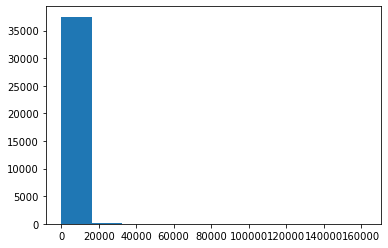

In [29]:
plt.hist(df2['impressions_per_day'])

(array([3.3863e+04, 1.9130e+03, 7.2600e+02, 4.1700e+02, 2.6900e+02,
        1.3500e+02, 1.1600e+02, 3.8000e+01, 5.8000e+01, 2.9000e+01]),
 array([5.82263711e-01, 1.96480261e+03, 3.92902295e+03, 5.89324330e+03,
        7.85746364e+03, 9.82168399e+03, 1.17859043e+04, 1.37501247e+04,
        1.57143450e+04, 1.76785654e+04, 1.96427857e+04]),
 <BarContainer object of 10 artists>)

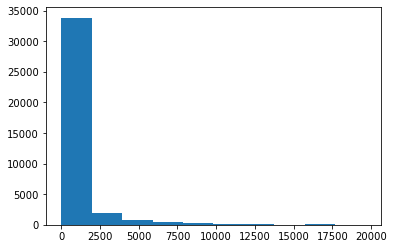

In [30]:
df2 = df2[df2['impressions_per_day']<20000]
plt.hist(df2['impressions_per_day'])

In [31]:
df2.shape

(37564, 40)

<ipython-input-32-b9f69462cf92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impressions_per_day_log'] = pd.DataFrame(np.log(df2['impressions_per_day']))


(array([1.0000e+00, 3.6000e+01, 3.8600e+02, 2.2440e+03, 5.3820e+03,
        1.2215e+04, 9.7180e+03, 4.4630e+03, 2.3390e+03, 7.8000e+02]),
 array([-0.54083182,  0.5017979 ,  1.54442762,  2.58705735,  3.62968707,
         4.67231679,  5.71494652,  6.75757624,  7.80020596,  8.84283569,
         9.88546541]),
 <BarContainer object of 10 artists>)

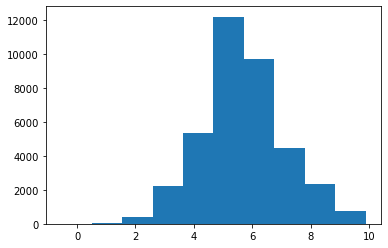

In [32]:
df2['impressions_per_day_log'] = pd.DataFrame(np.log(df2['impressions_per_day']))
plt.hist(df2['impressions_per_day_log'])

(array([1.0000e+00, 2.7000e+01, 2.6300e+02, 9.2800e+02, 3.1710e+03,
        4.6990e+03, 9.1810e+03, 1.2175e+04, 6.3370e+03, 7.8200e+02]),
 array([-2.86161762, -2.06127411, -1.26093061, -0.4605871 ,  0.3397564 ,
         1.14009991,  1.94044341,  2.74078692,  3.54113043,  4.34147393,
         5.14181744]),
 <BarContainer object of 10 artists>)

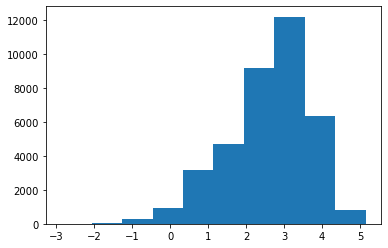

In [33]:
plt.hist(df2.spend_per_day)

# CPM_scaled

In [34]:
df2['CPM_scaled'] = pd.DataFrame(np.divide(np.array(df2['spend_per_day']), np.array(df2['impressions_per_day_log'])))
df2['CPM_scaled'] = df2['CPM_scaled']*1000
df2

<ipython-input-34-f64647d6f679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CPM_scaled'] = pd.DataFrame(np.divide(np.array(df2['spend_per_day']), np.array(df2['impressions_per_day_log'])))
<ipython-input-34-f64647d6f679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CPM_scaled'] = df2['CPM_scaled']*1000


,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log,CPM_scaled
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352,389.216887
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312,519.138853
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794,380.391085
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965,246.528692
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965,448.551190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000,6.725034,NaN
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111,8.884903,NaN
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333,5.113994,NaN
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000,7.772647,NaN


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01,
        1.8054e+04, 1.8360e+04, 3.9500e+02, 3.5000e+01, 7.0000e+00]),
 array([-4220.13330071, -3440.99244405, -2661.8515874 , -1882.71073075,
        -1103.56987409,  -324.42901744,   454.71183921,  1233.85269587,
         2012.99355252,  2792.13440918,  3571.27526583]),
 <BarContainer object of 10 artists>)

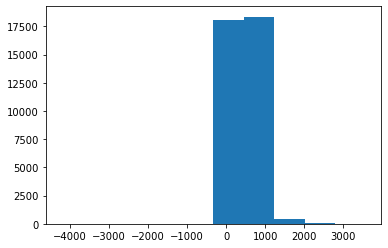

In [35]:
plt.hist(df2['CPM_scaled'])

In [36]:
df3 = df2[df2['CPM_scaled']>=-500]
df3 = df3[df3['CPM_scaled']<=2000]

(array([   41.,   707.,  5983., 14712., 11322.,  2961.,   728.,   246.,
           89.,    32.]),
 array([-464.84304413, -220.21206736,   24.41890942,  269.04988619,
         513.68086297,  758.31183974, 1002.94281652, 1247.57379329,
        1492.20477007, 1736.83574684, 1981.46672362]),
 <BarContainer object of 10 artists>)

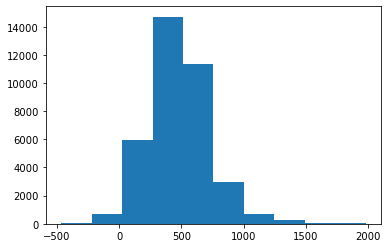

In [37]:
plt.hist(df3['CPM_scaled'])

C:\Users\root\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  119.,   889.,  2270.,  5204., 11254., 11606.,  3642.,   934.,
          258.,    65.]),
 array([ 0.        ,  4.4513669 ,  8.90273379, 13.35410069, 17.80546758,
        22.25683448, 26.70820137, 31.15956827, 35.61093516, 40.06230206,
        44.51366895]),
 <BarContainer object of 10 artists>)

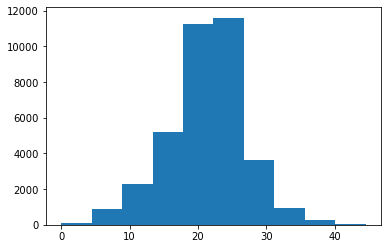

In [34]:
df3['CPM_scaled_sqrt'] = pd.DataFrame(np.sqrt(df3['CPM_scaled']))
plt.hist(df3['CPM_scaled_sqrt'])

In [35]:
# df3['CPM_scaled_cbrt'] = np.cbrt(df3['CPM_scaled'])
# plt.hist(df3['CPM_scaled_cbrt'])

In [36]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log,CPM_scaled
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352,389.216887
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312,519.138853
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794,380.391085
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965,246.528692
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965,448.551190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000,6.725034,NaN
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111,8.884903,NaN
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333,5.113994,NaN
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000,7.772647,NaN


In [37]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log,CPM_scaled
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352,389.216887
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312,519.138853
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794,380.391085
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965,246.528692
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965,448.551190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000,6.725034,NaN
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111,8.884903,NaN
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333,5.113994,NaN
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000,7.772647,NaN


In [38]:
df3.to_csv('Y:/Internship/SoMin/data/df_scaled_spend_impressions_per_day.csv')

In [39]:
utils.save_pickle(df3, 'Y:/Internship/SoMin/data/df_scaled_spend_impressions_per_day.pkl')

In [40]:
df3.shape

(36821, 43)